In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 61194 bytes


In [3]:
data = pd.read_csv('train.csv', sep =',') 

In [4]:
pd.options.display.max_rows = 10
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Информация по датасету (поля Age, Саbin, Embarked - содержат пропущенные значения)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.drop_duplicates() # На всякий случай удаляем дубликаты, в этом датасете их нет

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Удаление столбцов с данными, которые не влияют на результат (спасен/не спасен) PassengerId, Name,Ticket,Cabin,Embarked (порт посадки)

In [10]:
columns = ['PassengerId','Name','Ticket','Cabin','Embarked']
data.drop(columns, axis=1, inplace=True)

In [11]:
data.info() # что получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


Посмотрим количество уникальных значений  в каждом столбце

In [12]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
dtype: int64

Посмотрим какие уникальные значение имеются в каждом столбце (за исключением стоимости билета)


In [13]:
print("Уникальные значения в поле 'Survived' => {}".format(data.Survived.unique()))
print("Уникальные значения в поле 'Pclass' => {}".format(data.Pclass.unique()))
print("Уникальные значения в поле 'Sex' => {}".format(data.Sex.unique()))
print("Уникальные значения в поле 'Age' => {}".format(np.sort(data.Age.unique())))
print("Уникальные значения в поле 'SibSp' => {}".format(data.SibSp.unique()))
print("Уникальные значения в поле 'Parch' => {}".format(data.Parch.unique()))

Уникальные значения в поле 'Survived' => [0 1]
Уникальные значения в поле 'Pclass' => [3 1 2]
Уникальные значения в поле 'Sex' => ['male' 'female']
Уникальные значения в поле 'Age' => [ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.     nan]
Уникальные значения в поле 'SibSp' => [1 0 3 4 2 5 8]
Уникальные значения в поле 'Parch' => [0 1 2 5 3 4 6]


Замена значений 'male' 'female' на 1 и 0

In [14]:
data.Sex.replace({'male':1, 'female':0}, inplace=True)

Что делать с пропущенными значениями по возрасту, посмотрим на эти данные (177 строк с пропущенными значениями по возрасту).

In [15]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [16]:
data[data.Age.isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,1,NaN,0,0,8.4583
17,1,2,1,NaN,0,0,13.0000
19,1,3,0,NaN,0,0,7.2250
26,0,3,1,NaN,0,0,7.2250
28,1,3,0,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292
863,0,3,0,NaN,8,2,69.5500
868,0,3,1,NaN,0,0,9.5000
878,0,3,1,NaN,0,0,7.8958


Пока создадим отдельный датасет без пропущенных значений по возрасту

In [17]:
data_full_Age = data.dropna()
data_full_Age

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


Рассмотрим распределение значений полученных переменных на графиках.

<function matplotlib.pyplot.show>

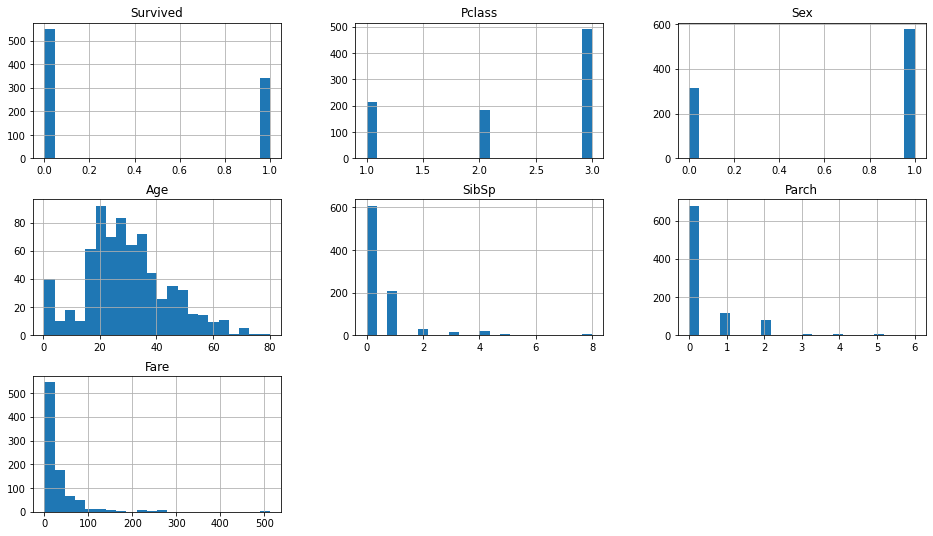

In [18]:
data.hist(figsize = (16, 9), bins = 22)
plt.show

Для рассмотрения доли спасенных в каждой категории применим способ сводных таблиц

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


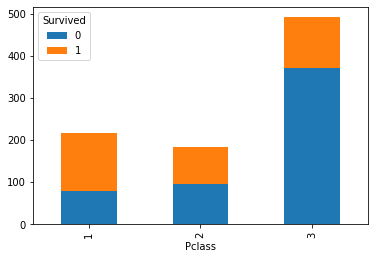

In [19]:
data.pivot_table('Sex','Pclass', 'Survived', 'count').plot(kind='bar',
                                                           stacked=True)
data.pivot_table('Sex','Pclass', 'Survived', 'count')

Конечно же больше спасенных было в 1 классе

Survived,0,1
Sex,,
0,81,233
1,468,109


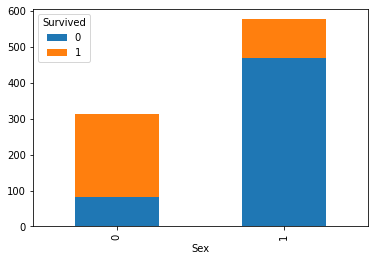

In [ ]:
data.pivot_table('Pclass','Sex', 'Survived', 'count').plot(kind='bar',
                                                           stacked=True)
data.pivot_table('Pclass','Sex', 'Survived', 'count')

Больше спаслось женщин чем мужчин

Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


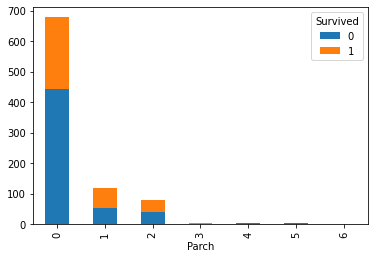

In [20]:
data.pivot_table('Pclass','Parch', 'Survived', 'count').plot(kind='bar',
                                                           stacked=True)
data.pivot_table('Pclass','Parch', 'Survived', 'count')

Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


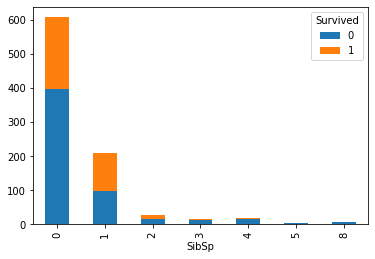

In [21]:
data.pivot_table('Pclass','SibSp', 'Survived', 'count').plot(kind='bar',
                                                           stacked=True)
data.pivot_table('Pclass','SibSp', 'Survived', 'count')

Больше шансов на спасение было у тех, у которых был один родственник (родитель, ребенок, сестра, брат и т.п.)

Посмотрим на среднее значение по спасению в разрезе возрастных категорий (по 10 лет), пола и класса (1 - все спаслись,0 -никто не спасся)

In [35]:
pd.options.display.max_rows = 15
age_int = pd.cut(data_full_Age['Age'], [0, 10, 20, 30, 40, 50, 60, 70,80])
data_full_Age.pivot_table('Survived', ['Sex', age_int], 'Pclass')

Pclass               1         2         3
Sex Age                                   
0   (0, 10]   0.000000  1.000000  0.500000
    (10, 20]  1.000000  1.000000  0.520000
    (20, 30]  0.952381  0.892857  0.500000
    (30, 40]  1.000000  0.941176  0.428571
    (40, 50]  0.923077  0.900000  0.000000
    (50, 60]  1.000000  0.666667       NaN
    (60, 70]  1.000000       NaN  1.000000
1   (0, 10]   1.000000  1.000000  0.363636
    (10, 20]  0.400000  0.100000  0.129630
    (20, 30]  0.473684  0.000000  0.144330
    (30, 40]  0.520000  0.115385  0.142857
    (40, 50]  0.375000  0.111111  0.090909
    (50, 60]  0.285714  0.000000  0.000000
    (60, 70]  0.000000  0.333333  0.000000
    (70, 80]  0.333333       NaN  0.000000

Видим, что практически все спаслись женщины 1, 2 класса, и мальчики от 0 до 10 лет, ехавшие в  1 и 2 классе и мальчики 10-20 лет из 2 го класса

Посмотрим на статистику спасенных в зависимости от стоимости билета. Если разбить диапазон стоимости билетов на 10 интервалов, то основное количество проданных билетов лежит в интервале от 0 до 51.233. Разобъем этот интервал еще на 5 интервалов, а интервал 102.466- 512.329 объединим в один.

In [40]:
pd.options.display.max_rows = 10
pd.value_counts(pd.cut(data.Fare, 10))

(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(204.932, 256.165]     11
(256.165, 307.398]      6
(461.096, 512.329]      3
(153.699, 204.932]      2
(409.863, 461.096]      0
(358.63, 409.863]       0
(307.398, 358.63]       0
Name: Fare, dtype: int64

In [45]:
pd.options.display.max_rows = 15
fare_int = pd.cut(data['Fare'], [-0.512, 10, 20, 30, 40, 51.233, 102.466, 512.329])
data.pivot_table('Pclass', fare_int,'Survived', 'count')

Survived,0,1
Fare,,
"(-0.512, 10.0]",269,67
"(10.0, 20.0]",103,76
"(20.0, 30.0]",79,63
"(30.0, 40.0]",35,23
"(40.0, 51.233]",13,4
"(51.233, 102.466]",36,70
"(102.466, 512.329]",14,36


Пассажиров со стоимостью билета более 51.233  спаслось больше, чем погибло
